In [1]:
from src.n_forest import *
%matplotlib widget

Parameters

In [10]:
rho = 4.2     # fertility
f = 1         # aging_rate
a_1 = 1       # biotic_pump_young
a_2 = 0       # biotic_pump_old
h = 2         # mortality_old
dist = range(10, 910, 100)
beta_2 = np.arange(0.01, 0.5, 0.05)

# dist = range(10, 310, 100)
# beta_2 = np.arange(0.01, 0.3, 0.05)

P_0 = 1.05
w_0 = 1
alpha_0 = -1.0
beta_1 = 0

arguments = (rho,f,a_1,h,a_2,dist,beta_2,P_0,w_0,alpha_0,beta_1)

Data for the heatmap of number of killed forests against distance and $\beta_2$

In [11]:
grid = np.zeros((len(dist),len(beta_2)))

i = 0
for d in dist:
    j = 0
    for b2 in beta_2:
        args = (rho,f,a_1,h,a_2,d,b2,P_0,w_0,alpha_0,beta_1)
        x0s = np.random.uniform(0,3,10)
        y0s = np.random.uniform(0,3,10)
        x, y, defor = system_n_forests(x0s, y0s, args, perturbed=True)
        grid[i,j] = len([eco for eco in x if eco[-1] < 0.5])
        j+=1
    i+=1

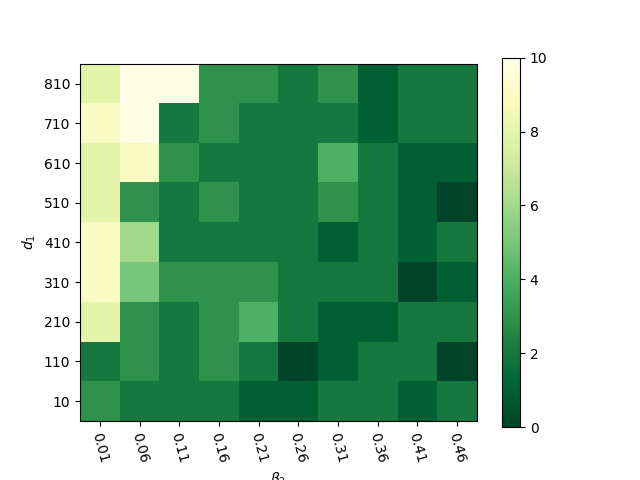

In [27]:
fig, ax = plt.subplots()
im = ax.imshow(grid, origin='lower', cmap='YlGn_r')
ax.set_xlabel(r'$\beta_2$')
ax.set_xticks(range(len(beta_2)))
ax.set_xticklabels([round(b2,2) for b2 in beta_2], rotation=-75)
ax.set_ylabel(r'$d_1$')
ax.set_yticks(range(len(dist)))
ax.set_yticklabels(dist)
fig.colorbar(im)
plt.show()

Data for heatmap of number of killed forest per combination of killed forests

In [4]:
killgrid = np.zeros((10,10))

args = (rho,f,a_1,h,a_2,50,0.15,P_0,w_0,alpha_0,beta_1)

for _ in range(10):
    x0s, y0s = np.random.uniform(0,4,10), np.random.uniform(0,4,10) 
    x, y, ids = system_n_forests(x0s, y0s, args, perturbed = True)

    print(ids)
    # break

    num_kills = sum([1 for forest in x if np.isclose(forest[-1], 0.0)])

    killgrid[ids[0], ids[1]] = num_kills

[3, 8]
[2, 8]
[4, 7]
[8, 0]
[5, 2]
[7, 8]
[6, 8]
[7, 6]
[3, 6]
[8, 1]


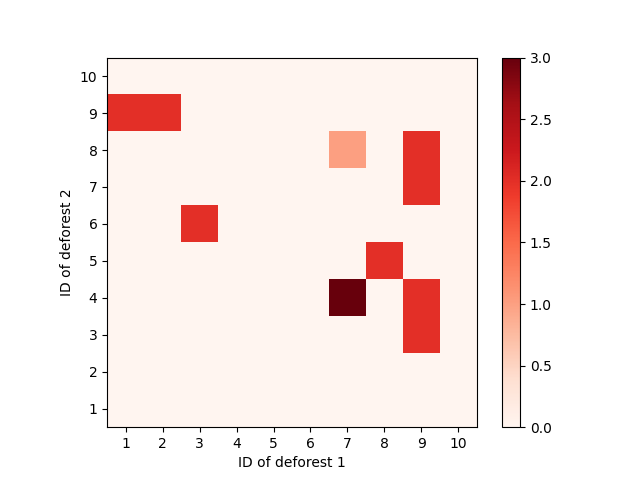

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(killgrid, origin='lower', cmap='Reds')
ax.set_xlabel('ID of deforest 1')
ax.set_xticks(range(10))
ax.set_xticklabels(range(1,11))
ax.set_ylabel('ID of deforest 2')
ax.set_yticks(range(10))
ax.set_yticklabels(range(1,11))
fig.colorbar(im)
plt.show()

In [13]:
from itertools import combinations

In [22]:
combinations(range(10),2)

In [25]:
tuple([0,1]) == (0,1)

True

In [26]:
l = [1,2,3]
l.remove(1)
l

[2, 3]